# Generative Adversarial Networks

A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. Goodfellow proposed a design of two neural networks contesting with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss).

<img src='https://i1.wp.com/bdtechtalks.com/wp-content/uploads/2018/05/GANs.png?resize=696%2C304&ssl=1' />

Given a training set, this technique learns to generate new data with the same statistics as the training set. For example, a GAN trained on photographs can generate new photographs that look at least superficially authentic to human observers, having many realistic characteristics. Though originally proposed as a form of generative model for unsupervised learning, GANs have also proven useful for semi-supervised learning, fully supervised learning, and reinforcement learning.

The core idea of a GAN is based on the "indirect" training through the discriminator, which itself is also being updated dynamically. This basically means that the generator is not trained to minimize the distance to a specific image, but rather to fool the discriminator. This enables the model to learn in an unsupervised manner.


## Artist v.s. Critics

As an analogy, we can consider the scenario: two models are trained simultaneously by an adversarial process. A generator ("the artist") learns to create images that look real, while a discriminator ("the art critic") learns to tell real images apart from fakes.

<img src='https://www.tensorflow.org/tutorials/generative/images/gan1.png' />

During training, the generator progressively becomes better at creating images that look real, while the discriminator becomes better at telling them apart. The process reaches equilibrium when the discriminator can no longer distinguish real images from fakes.

<img src='https://www.tensorflow.org/tutorials/generative/images/gan2.png' />

This notebook demonstrates this process on the MNIST dataset. The following animation shows a series of images produced by the generator as it was trained for 50 epochs. The images begin as random noise, and increasingly resemble hand written digits over time.


### Reference
- Wikipedia entry: [Generative Adversarial Networks](https://en.wikipedia.org/wiki/Generative_adversarial_network)
- TensorFlow tutorial: [Deep Convolutional Generative Adversarial Network](https://www.tensorflow.org/tutorials/generative/dcgan)
- Goodfellow, Ian; Pouget-Abadie, Jean; Mirza, Mehdi; Xu, Bing; Warde-Farley, David; Ozair, Sherjil; Courville, Aaron; Bengio, Yoshua (2014). [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661). *Proceedings of the International Conference on Neural Information Processing Systems (NIPS 2014)*. pp. 2672–2680.


In [1]:
# load libraries
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [3]:
# Prepare data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

(60000, 28, 28, 1)


(array([38847859.,   571880.,   514157.,   438029.,   446644.,   503214.,
          469607.,   518723.,   611860.,  4118027.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

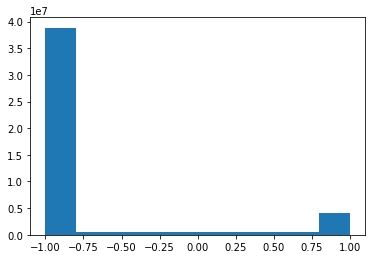

In [4]:
print(train_images.shape)
plt.hist(train_images.flatten())